In [20]:
import pandas as pd 
import numpy as np

### Preprocessing

In [33]:
data = pd.read_csv('./dataset/real_news/real_news1.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2353 non-null   int64 
 1   Title       2333 non-null   object
 2   Content     2353 non-null   object
dtypes: int64(1), object(2)
memory usage: 55.3+ KB


In [22]:
import re
from underthesea import word_tokenize

def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
 
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
 
dicchar = loaddicchar()
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)
     
def text_preprocess(document):
    # xóa html code
    document = remove_html(document)
    # chuẩn hóa unicode
    document = convert_unicode(document)
    # tách từ
    document = word_tokenize(document, format="text")
    # đưa về lower
    document = document.lower()
    # xóa các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document
 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
docs = ['Chiến tranh vũ trang thảm khốc và chiến tranh chính trị lừa dối do những người cộng sản phát động đã đẩy chính quyền Việt Nam Cộng Hòa ở miền Nam vào cuộc khủng hoảng nặng nề, triền miên không có điểm dừng. Trước nguy cơ sụp đổ của chính quyền Việt Nam Cộng Hòa, một chính quyền được tổ chức theo mô hình dân chủ văn minh, có tam quyền phân lập thực sự, nhờ thế người dân miền Nam bước đầu đã có tự do dân chủ thực sự, một chính quyền đang chiến đấu ngăn chặn sự tràn lan bạo lực cộng sản; Trước nguy cơ cả Đông Nam Á bị tràn ngập trong sắt máu bạo lực cộng sản, năm 1965, sáu năm sau nghị quyết 15 của đảng CSVN sử dụng bạo lực thâu tóm miền Nam, gần sáu năm sau tiếng súng nội chiến bùng nổ ở miền Nam, Mĩ mới đưa quân vào miền Nam Việt Nam cứu đồng minh Việt Nam Cộng Hòa trước nguy cơ sụp đổ và củng cố một tiền đồn ngăn chặn cơn thác lũ cách mạng bạo lực cộng sản đang ở đỉnh cao trào. Năm 1965, quân đội Mĩ đổ vào Việt Nam cũng như năm 1944 quân đội Mĩ đổ bộ vào châu Âu trong chiến tranh thế giới thứ hai, cũng như năm 1950 quân đội Mĩ đổ bộ lên bán đảo Triều Tiên đều không có mục đích xâm lược, không đánh chiếm lãnh thổ mà chỉ để làm trách nhiệm của một đồng minh và làm trách nhiệm của một nước lớn bảo đảm một thế giới ổn định, công bằng, bảo vệ những giá trị tự do, dân chủ của con người, ngăn chặn thảm họa phát xít thời thế chiến hai và ngăn chặn thảm họa cộng sản đang như bệnh dịch nhấn chìm thế giới vào hận thù đấu tranh giai cấp, vào bạo lực chuyên chính vô sản và nô dịch con người.Cần giấu biến cuộc nội xâm tội lỗi của ý thức hệ giai cấp, cuộc nội xâm mang hận thù giai cấp vay mượn, mang tư tưởng bạo lực chuyên chính vô sản ngoại lai, mang súng đạn của thế giới cộng sản về đánh phá dân tộc, nô dịch nhân dân, thống trị đất nước, ngay từ khi phát động cuộc nội chiến phi nghĩa núp bóng cuộc chiến tranh chính nghĩa “giải phóng miền Nam”, những người cộng sản đã vẽ ra con ngáo ộp “đế quốc Mĩ” hiếu chiến, tham tàn, man rợ hù dọa người dân, đã lôi “đế quốc Mĩ” vào tham chiến để biến cuộc nội chiến thành cuộc thánh chiến như lời bài hát của nhạc sĩ cộng sản Lưu Hữu Phước sáng tác năm 1960: “Giải phóng miền Nam chúng ta cùng quyết tiến bước/Diệt đế quốc Mĩ phá tan bè lũ bán nước”. Năm 1965, những đơn vị tinh nhuệ, hiện đại nức tiếng của quân đội Mĩ, những sư đoàn Kị Binh Bay Số 1, lữ đoàn Tia Chớp Nhiệt Đới... với xe tăng lổm ngổm bò kín đất Vạn Tường, Quảng Ngãi, máy bay lên thẳng vè vè rợp trời Bông Trang Nhà Đỏ, Bình Dương thì hệ thống tuyên truyền nhà nước Việt Nam cộng sản như bắt được vàng, như được trích một liều đô pinh mạnh, họ reo lên: “Có những ngày vui sao cả nước lên đường/Xao xuyến bờ tre từng hồi trống giục... Bộ đội dân công trùng trùng điệp điệp/Chào nhau không kịp nhớ mặt nhớ tên/Đội ngũ ta đi dài theo tiếng hát...” Đó là thơ của nhà thơ quân đội Nhân dân Việt Nam, Chính Hữu. Khi reo lên như vậy, năm 1966, nhà thơ Chính Hữu là thiếu tá ở cục Tuyên huấn, Tổng cục Chính trị. Lúc chết, năm 2007, ông là đại tá.',
'Năm 1973, quân đội Mĩ rút khỏi Việt Nam thì những người Cộng sản càng đẩy mạnh cuộc nội chiến để chỉ hai năm sau họ thâu tóm hoàn toàn miền Nam vào ngày 30. 4. 1975.Là cuộc nội chiến nên đích cuối cùng những người lính Việt Nam Cộng sản đến không phải là tổng hành dinh quân đội Mĩ mà là dinh Độc lập, nơi làm việc của Tổng thống Việt Nam Cộng Hòa, người quản lí một nửa lãnh thổ Việt Nam, người lãnh đạo một nửa dân số Việt Nam. Là cuộc nội chiến nên lá cờ những người lính Việt Nam Cộng sản hạ xuống ở dinh Độc lập ngày 30. 4. 1975 không phải là lá cờ Mĩ mà là lá cờ Việt Nam Cộng Hòa, lá cờ quốc gia của một nửa lãnh thổ Việt Nam, lá cờ Tổ quốc của một nửa dân tộc Việt Nam.Những người Cộng sản Việt Nam đã cắt đôi đất nước Việt Nam, chia đôi dân tộc Việt Nam rồi họ lại lấy máu của chính dân tộc Việt Nam để thống nhất đất nước, để họ nghiễm nhiên thống trị cả nước không cần lá phiếu bầu chọn của người dân! Những người Cộng sản Việt Nam coi đó là chiến thắng vĩ đại của họ. Còn với dân tộc Việt Nam đó là keo thua đau đớn tức tưởi! Với những người dân miền Nam đã được sống trong tự do dân chủ, nay mất cả quyền con người, quyền công dân, không được quyền bầu chọn người quản lí đất nước, người lãnh đạo dân chúng, còn cái thua nào đau hơn!Điểm lại những sự kiện chính của cuộc chiến tranh do những người cộng sản Việt Nam phát động từ 1960 đến ngày kết thúc 30.4.1975 để thấy rõ cuộc chiến này dứt khoát không phải là cuộc chiến tranh giải phóng dân tộc mà chỉ là cuộc nội chiến đẫm máu nhất, tội lỗi nhất trong lịch sử Việt Nam để đảng Cộng sản Việt Nam giành quyền thống trị cả nước, nô dịch cả dân tộc Việt Nam.']

# 1. Tách term word
from pyvi import ViTokenizer, ViPosTagger
tokennizer = ViTokenizer.tokenize(docs[0])
pos_tagger = ViPosTagger.postagging(tokennizer)
post_tagger = [' '.join(pos_tagger[0])]
tokens = []
for doc in docs:
  tokennizer = ViTokenizer.tokenize(doc)
  tokens.append(tokennizer)
tokens

In [26]:
with open('vietnamese-stopwords.txt') as f:
  stop_words = f.readlines()
  stop_words = list(set(m.replace(' ', '_').strip() for m in stop_words))

In [27]:
def remove_stop_words(corpus):
  result = []
  for doc in corpus:
    for word in doc.split(' '):
      if word in stop_words:
        doc = doc.replace(' '+word+' ', ' ')
    result.append(doc)
  return result

In [44]:
content = data['Content']
content_new = []
for i in content:
  doc = text_preprocess(i)
  content_new.append(doc)

In [47]:
content_new = remove_stop_words(content_new)
content_new[1]

'sáng 29 9 ban thường_vụ thành_ủy triệu_tập hội_nghị 17 ban_chấp_hành đảng_bộ tphcm khóa xi làm_việc nội_dung xoay quanh tình_hình kinh_tế xã_hội 9 đầu nhiệm_vụ giải_pháp 3 2022 sơ_kết 1 tp hcm phòng chống dịch_covid 19 phục_hồi kinh_tế bí_thư thành_ủy nguyễn_văn_nên phát_biểu chỉ_đạo hội_nghị đứng đầu thành_ủy hôm_nay tròn 1 ban thường_vụ thành_ủy họp ý_kiến chỉ_thị 18 ubnd tp kiểm_soát điều_chỉnh biện_pháp phòng chống dịch_covid 19 phục_hồi phát_triển kinh_tế xã hội địa_bàn ý_kiến tình_hình kinh_tế xã hội 9 đầu 2021 nghị_quyết 2 nhận_định 5 quan_điểm 3 nhiệm_vụ giải_pháp 3 chiến_lược then_chốt _đến đọc nghị_quyết thời_khắc ý_nghĩa bàn ý_kiến trao_đổi giải_pháp lo_lắng tình_hình kinh_tế xã hội 9 2021 chỉ_tiêu tăng_trưởng âm thu ngân_sách 7 4 kỳ 2020 1 kết_quả nghị_quyết thảo_luận nguyên_nhân bí_thư thành_ủy giai_đoạn cực_kỳ tình_thế nhiệm_vụ trọng_trách đảng nhân_dân cam_kết chính_trị hành_động quyết_liệt niềm sức_mạnh góp_phần kết_quả hôm_nay kết_quả cực_kỳ toàn_diện phấn_khởi niềm d

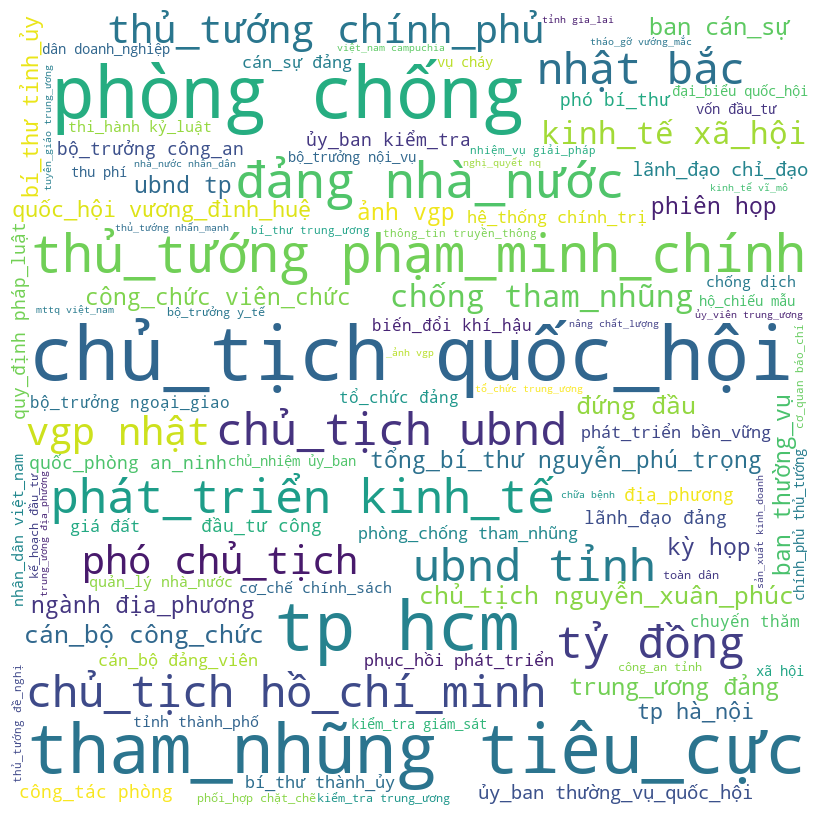

In [50]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''

# iterate through the csv file
for val in content_new:
	
	
	comment_words += val

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
